In [1]:
import pandas as pd 
import numpy as np
import netCDF4
import xarray as xr 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.dates as mdates
from scipy.fftpack import fft
import scipy.fftpack

In [2]:
wind4 = xr.open_dataset('ERA5-Algeria_wind-4.nc') #2011-01-01T00:00 to 2018-12-31T21:00

In [3]:
w4 = np.sqrt(np.square(wind4.u100)+np.square(wind4.v100))

In [4]:
#In Salah region_________Import data
sol1 = xr.open_dataset('ERA5-Sahara_sol+wind100_2007-2010.nc')  #2007-01-01T00:00:00   to   2010-12-31T23:00:00
sol2 = xr.open_dataset('ERA5-Sahara_sol+wind100_2011-2014.nc')  #2011-01-01T00:00:00   to   2014-12-31T23:00:00
sol3 = xr.open_dataset('ERA5-Sahara_sol+wind100_2015-2018.nc')  #2018-12-31T22:00:00   to   2018-12-31T23:00:00

In [5]:
#merge three datasets
wos = xr.merge([sol1, sol2, sol3])

In [6]:
w0 = np.sqrt(np.square(wos.u100)+np.square(wos.v100))

In [7]:
w03 = w0.sel(longitude=-0.25 , latitude=28 ,time=slice('2007-01-01T00:00','2018-09-30T23:00:00')) #Adrar..............................
w05 = w0.sel(longitude=2.5 , latitude=28.25 ,time=slice('2007-01-01T00:00','2018-09-30T23:00:00')) #Max_In_Salah_lat: 28.25 lon: 2.5 
w08 = w0.sel(longitude=2.25 , latitude=25.5 ,time=slice('2007-01-01T00:00','2018-09-30T23:00:00')) #The min_pearson_In_Salah_region................ . . . .. 
w09 = w0.sel(longitude=-0.5 , latitude=32.75 ,time=slice('2007-01-01T00:00','2018-09-30T23:00:00'))#Max_pearson

## ///////////////////////////////////////////////////////////////////////////////////// 3

In [8]:
nwc3 = np.array(w03)
hwc3 = 5/(np.array(w03['time.hour'])+1)
dwc3 = np.array(w03['time.day'])*1/22393+5
mwc3 = np.array(w03['time.month'])*22/(22393*7)+65/22394

data3 = [hwc3, dwc3, mwc3, nwc3]
data3 = pd.DataFrame(data3).T
data3[4]=data3[0]*data3[1]*data3[2]

In [9]:
two = data3[0:8784]
two = [two[4], two[3]]
two3 = pd.DataFrame(two, index=['index', 'speed']).T

In [10]:
mean3 = data3.groupby([4])[3].mean() # mean wind speed based on the new indexing
onei = pd.DataFrame(mean3.index)
ones = pd.DataFrame(mean3)
one1 = np.array(onei).T
one2 = np.array(ones).T
one = np.vstack([one1,one2])
one3 = pd.DataFrame(one, index=['index','speed']).T

In [11]:
three3 = two3.merge(one3, on='index', how='left')

In [12]:
mean3 = pd.DataFrame(mean3)
#climate = np.array(np.arange(1,2929,1)/8)
climate = [np.arange(1,2928*3+1,1)/24, three3['speed_y']]
climate = np.array(climate)
climate3 = pd.DataFrame(climate).T

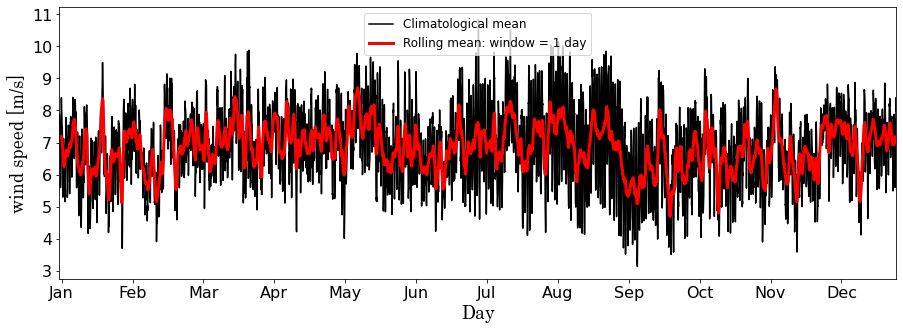

In [13]:
plt.figure(figsize=(15,5))


plt.plot(climate3[0], climate3[1], label="Climatological mean", color='black')
#-------smoothing--------------------------
rolling = climate3.rolling(window=24)
rolling = rolling.mean()
plt.plot(rolling[0], rolling[1], label="Rolling mean: window = 1 day", color='red', linewidth=3)
#plt.plot(mr3[0], mr3[1], label="Rolling mean: window = 15 days", color='blue', linewidth=3)

#plt.xticks(fontsize=16)
plt.xticks(np.arange(1, 366, step=31), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Day',fontname='Century',fontsize=18, color='black')
plt.ylabel('wind speed [m/s]',fontname='Century', fontsize=18, color='black')
plt.legend(fontsize=12, loc='upper center')
plt.xlim(0, 366, '%b')

dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis

plt.show()
#plt.plot(rolling.index, rolling[0], color='red', linewidth=3)


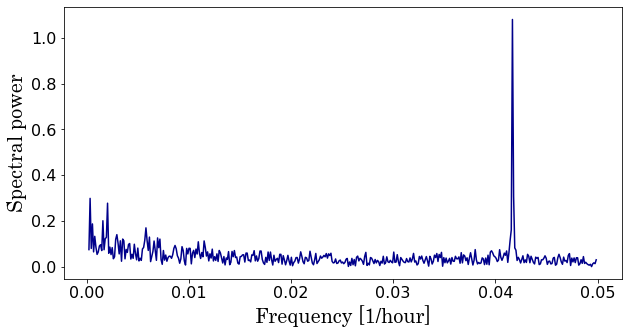

In [14]:
#Power spectral
#data x & y
t=np.array(climate3[0])
y = np.array(climate3[1])  #y as afunction of t, thier data count is the same


# sampling data
N = len(t)
# sample spacing
T = 1#/24


yf = scipy.fftpack.fft(y, N)   #the power data
xf = np.linspace(0.0, 1.0//(T), N)


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xf[2:N//20], 2.0/N * np.abs(yf[2:N//20]), color='darkblue')
#plt.plot(spec9[0], (spec9[1]*spec9[1]*spec9[1]*spec9[1]*spec9[1])/0.00011*0.28, color='red')
#plt.ylim(0,0.1)
#ax.set_xscale('log')
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
#ax.set_xscale('log')
#ax.plot(x, y)
#plt.xlim(0 ,0.08)

plt.xlabel('Frequency [1/hour]', fontname='Century', size=20)
plt.ylabel('Spectral power', fontname='Century',size=20)
plt.show()

## ///////////////////////////////////////////////////////////////////////////////////// 5

In [15]:
nwc5 = np.array(w05)
hwc5 = 5/(np.array(w05['time.hour'])+1)
dwc5 = np.array(w05['time.day'])*1/22393+5
mwc5 = np.array(w05['time.month'])*22/(22393*7)+65/22394

data5 = [hwc5, dwc5, mwc5, nwc5]
data5 = pd.DataFrame(data5).T
data5[4]=data5[0]*data5[1]*data5[2]

In [16]:
two = data5[0:8784]
two = [two[4], two[3]]
two5 = pd.DataFrame(two, index=['index', 'speed']).T

In [17]:
mean5 = data5.groupby([4])[3].mean() # mean wind speed based on the new indexing
onei = pd.DataFrame(mean5.index)
ones = pd.DataFrame(mean5)
one1 = np.array(onei).T
one2 = np.array(ones).T
one = np.vstack([one1,one2])
one5 = pd.DataFrame(one, index=['index','speed']).T

In [18]:
three5 = two5.merge(one5, on='index', how='left')

In [19]:
#std =  data.groupby([0])[3].std()
mean5 = pd.DataFrame(mean5)
#climate = np.array(np.arange(1,2929,1)/8)
climate = [np.arange(1,2928*3+1,1)/24, three5['speed_y']]
climate = np.array(climate)
climate5 = pd.DataFrame(climate).T

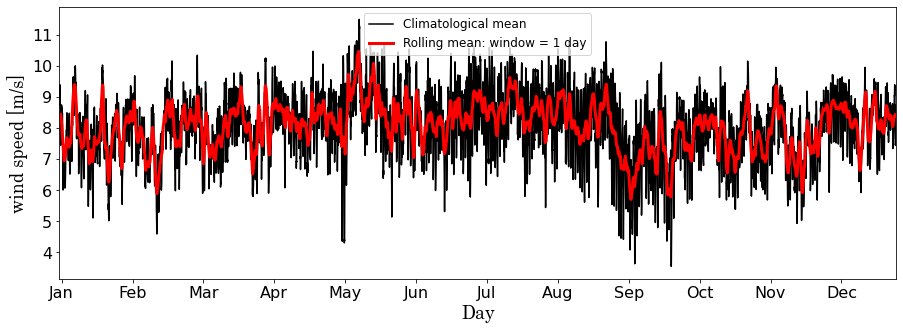

In [20]:
import matplotlib.dates as mdates
plt.figure(figsize=(15,5))


plt.plot(climate5[0], climate5[1], label="Climatological mean", color='black')
#-------smoothing--------------------------
rolling = climate5.rolling(window=24)
rolling = rolling.mean()
plt.plot(rolling[0], rolling[1], label="Rolling mean: window = 1 day", color='red', linewidth=3)
#plt.plot(mr5[0], mr5[1], label="Rolling mean: window = 15 days", color='blue', linewidth=3)

#plt.xticks(fontsize=16)
plt.xticks(np.arange(1, 366, step=31), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Day',fontname='Century',fontsize=18, color='black')
plt.ylabel('wind speed [m/s]',fontname='Century', fontsize=18, color='black')
plt.legend(fontsize=12, loc='upper center')
plt.xlim(0, 366, '%b')

dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis

plt.show()
#plt.plot(rolling.index, rolling[0], color='red', linewidth=3)


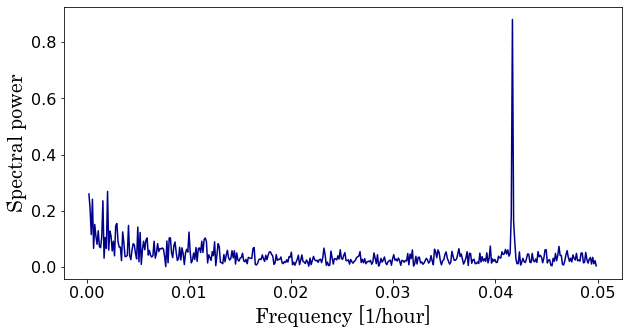

In [21]:
#Power spectral
#data x & y
t=np.array(climate5[0])
y = np.array(climate5[1])  #y as afunction of t, thier data count is the same


# sampling data
N = len(t)
# sample spacing
T = 1#/24


yf = scipy.fftpack.fft(y, N)   #the power data
xf = np.linspace(0.0, 1.0//(T), N)


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xf[2:N//20], 2.0/N * np.abs(yf[2:N//20]), color='darkblue')
#plt.plot(spec9[0], (spec9[1]*spec9[1]*spec9[1]*spec9[1]*spec9[1])/0.00011*0.28, color='red')
#plt.ylim(0,0.1)
#ax.set_xscale('log')
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
#ax.set_xscale('log')
#ax.plot(x, y)
#plt.xlim(0 ,0.08)

plt.xlabel('Frequency [1/hour]', fontname='Century', size=20)
plt.ylabel('Spectral power', fontname='Century',size=20)
plt.show()

## ///////////////////////////////////////////////////////////////////////////////////// 8

In [22]:
nwc8 = np.array(w08)
hwc8 = 5/(np.array(w08['time.hour'])+1)
dwc8 = np.array(w08['time.day'])*1/22393+5
mwc8 = np.array(w08['time.month'])*22/(22393*7)+65/22394

data8 = [hwc8, dwc8, mwc8, nwc8]
data8 = pd.DataFrame(data8).T
data8[4]=data8[0]*data8[1]*data8[2]

In [23]:
two = data8[0:8784]
two = [two[4], two[3]]
two8 = pd.DataFrame(two, index=['index', 'speed']).T

In [24]:
mean8 = data8.groupby([4])[3].mean() # mean wind speed based on the new indexing
onei = pd.DataFrame(mean8.index)
ones = pd.DataFrame(mean8)
one1 = np.array(onei).T
one2 = np.array(ones).T
one = np.vstack([one1,one2])
one8 = pd.DataFrame(one, index=['index','speed']).T

In [25]:
three8 = two8.merge(one8, on='index', how='left')

In [26]:
mean8 = pd.DataFrame(mean8)
#climate = np.array(np.arange(1,2929,1)/8)
climate = [np.arange(1,2928*3+1,1)/24, three8['speed_y']]
climate = np.array(climate)
climate8 = pd.DataFrame(climate).T

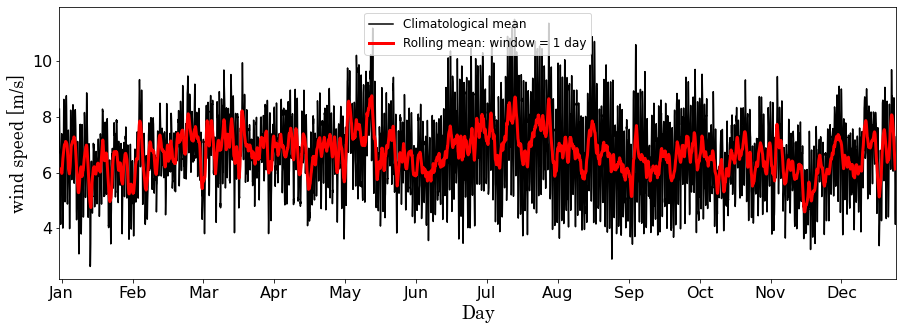

In [27]:
import matplotlib.dates as mdates
plt.figure(figsize=(15,5))


plt.plot(climate8[0], climate8[1], label="Climatological mean", color='black')
#-------smoothing--------------------------
rolling = climate8.rolling(window=24)
rolling = rolling.mean()
plt.plot(rolling[0], rolling[1], label="Rolling mean: window = 1 day", color='red', linewidth=3)
#plt.plot(mr8[0], mr8[1], label="Rolling mean: window = 15 days", color='blue', linewidth=3)

#plt.xticks(fontsize=16)
plt.xticks(np.arange(1, 366, step=31), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Day',fontname='Century',fontsize=18, color='black')
plt.ylabel('wind speed [m/s]',fontname='Century', fontsize=18, color='black')
plt.legend(fontsize=12, loc='upper center')
plt.xlim(0, 366, '%b')

dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis

plt.show()
#plt.plot(rolling.index, rolling[0], color='red', linewidth=3)


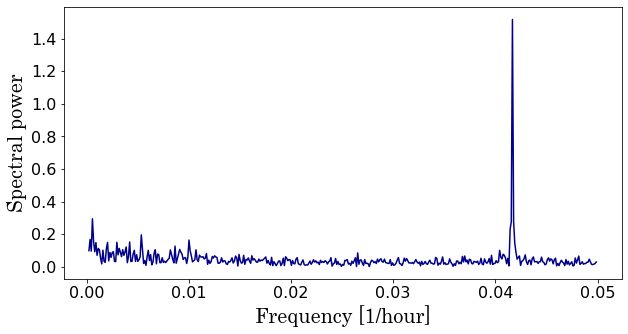

In [28]:
#Power spectral
#data x & y
t=np.array(climate8[0])
y = np.array(climate8[1])  #y as afunction of t, thier data count is the same


# sampling data
N = len(t)
# sample spacing
T = 1#/24


yf = scipy.fftpack.fft(y, N)   #the power data
xf = np.linspace(0.0, 1.0//(T), N)


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xf[2:N//20], 2.0/N * np.abs(yf[2:N//20]), color='darkblue')
#plt.plot(spec9[0], (spec9[1]*spec9[1]*spec9[1]*spec9[1]*spec9[1])/0.00011*0.28, color='red')
#plt.ylim(0,0.1)
#ax.set_xscale('log')
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
#ax.set_xscale('log')
#ax.plot(x, y)
#plt.xlim(0 ,0.08)

plt.xlabel('Frequency [1/hour]', fontname='Century', size=20)
plt.ylabel('Spectral power', fontname='Century',size=20)
plt.show()

## ///////////////////////////////////////////////////////////////////////////////////// 9

In [29]:
nwc9 = np.array(w09)
hwc9 = 5/(np.array(w09['time.hour'])+1)
dwc9 = np.array(w09['time.day'])*1/22393+5
mwc9 = np.array(w09['time.month'])*22/(22393*7)+65/22394

data9 = [hwc9, dwc9, mwc9, nwc9]
data9 = pd.DataFrame(data9).T
data9[4]=data9[0]*data9[1]*data9[2]

In [30]:
two = data9[0:8784]
two = [two[4], two[3]]
two9 = pd.DataFrame(two, index=['index', 'speed']).T

In [31]:
mean9 = data9.groupby([4])[3].mean()
onei = pd.DataFrame(mean9.index)
ones = pd.DataFrame(mean9)
one1 = np.array(onei).T
one2 = np.array(ones).T
one = np.vstack([one1,one2])
one9 = pd.DataFrame(one, index=['index','speed']).T

In [32]:
three9 = two9.merge(one9, on='index', how='left')

In [33]:
mean9 = pd.DataFrame(mean9)
#climate = np.array(np.arange(1,2929,1)/8)
climate = [np.arange(1,2928*3+1,1)/24, three9['speed_y']]
climate = np.array(climate)
climate9 = pd.DataFrame(climate).T

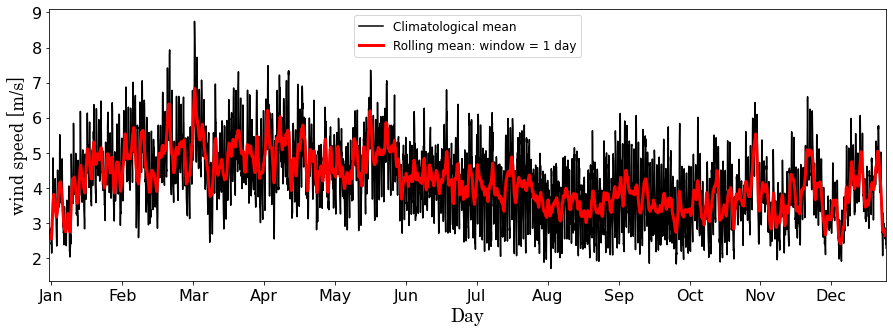

In [34]:
plt.figure(figsize=(15,5))


plt.plot(climate9[0], climate9[1], label="Climatological mean", color='black')
#-------smoothing--------------------------
rolling = climate9.rolling(window=24)
rolling = rolling.mean()
plt.plot(rolling[0], rolling[1], label="Rolling mean: window = 1 day", color='red', linewidth=3)
#plt.plot(mr9[0], mr9[1], label="Rolling mean: window = 15 days", color='blue', linewidth=3)

#plt.xticks(fontsize=16)
plt.xticks(np.arange(1, 366, step=31), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Day',fontname='Century',fontsize=18, color='black')
plt.ylabel('wind speed [m/s]',fontname='Century', fontsize=18, color='black')
plt.legend(fontsize=12, loc='upper center')
plt.xlim(0, 366, '%b')

dtFmt = mdates.DateFormatter('%b') # define the formatting
plt.gca().xaxis.set_major_formatter(dtFmt) # apply the format to the desired axis

plt.show()
#plt.plot(rolling.index, rolling[0], color='red', linewidth=3)


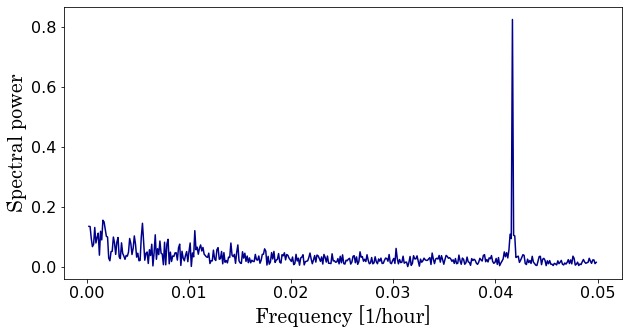

In [35]:
#Power spectral
#data x & y
t=np.array(climate9[0])
y = np.array(climate9[1])  #y as afunction of t, thier data count is the same


# sampling data
N = len(t)
# sample spacing
T = 1#/24


yf = scipy.fftpack.fft(y, N)   #the power data
xf = np.linspace(0.0, 1.0//(T), N)


fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xf[2:N//20], 2.0/N * np.abs(yf[2:N//20]), color='darkblue')
#plt.plot(spec9[0], (spec9[1]*spec9[1]*spec9[1]*spec9[1]*spec9[1])/0.00011*0.28, color='red')
#plt.ylim(0,0.1)
#ax.set_xscale('log')
plt.xticks(fontsize=16);
plt.yticks(fontsize=16);
#ax.set_xscale('log')
#ax.plot(x, y)
#plt.xlim(0 ,0.08)

plt.xlabel('Frequency [1/hour]', fontname='Century', size=20)
plt.ylabel('Spectral power', fontname='Century',size=20)
plt.show()